  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


Saving Recording (2).m4a to Recording (2) (2).m4a
Saving Recording (3).m4a to Recording (3) (3).m4a
Saving Recording (4).m4a to Recording (4) (1).m4a
Saving Recording (5).m4a to Recording (5) (1).m4a
Saving Recording.m4a to Recording (7).m4a


Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



🎧 File 1: Recording (2) (2).m4a


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
Your max_length is set to 100, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)



📝 Transcription:
 Overall, it's an entertaining film worth watching once, especially if you're into light-hearted yet thought-provoking narratives.

🧠 Summary:
Overall, it's an entertaining film worth watching once, especially if you're into light-hearted yet thought-provoking narratives.

📊 Sentiment:
Label: POSITIVE, Confidence: 1.00

🎧 File 2: Recording (3) (3).m4a


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
Your max_length is set to 100, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)



📝 Transcription:
 A movie was average.

🧠 Summary:
A movie was average. That's what a movie is supposed to be about. A movie is average. It's not a bad movie.

📊 Sentiment:
Label: NEGATIVE, Confidence: 0.99

🎧 File 3: Recording (4) (1).m4a


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
Your max_length is set to 100, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)



📝 Transcription:
 A plot felt quite predictable and lacked the emotional or intellectual depth needed to keep the audience fully engaged.

🧠 Summary:
"A plot felt quite predictable and lacked the emotional or intellectual depth needed to keep the audience fully engaged," says reviewer.

📊 Sentiment:
Label: NEGATIVE, Confidence: 1.00

🎧 File 4: Recording (5) (1).m4a


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
Your max_length is set to 100, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)



📝 Transcription:
 Our dialogues lacked punch and often felt forced, making it hard to connect with what the characters were trying to convey.

🧠 Summary:
"Our dialogues lacked punch and often felt forced," says reviewer. "It was hard to connect with what the characters were trying to convey"

📊 Sentiment:
Label: NEGATIVE, Confidence: 1.00

🎧 File 5: Recording (7).m4a


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
Your max_length is set to 100, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)



📝 Transcription:
 Each character was well developed with clear motivations, making it easy to connect with their journey and struggles.

🧠 Summary:
Each character was well developed with clear motivations, making it easy to connect with their journey and struggles. The book was a great read for those looking for a new perspective on life.

📊 Sentiment:
Label: POSITIVE, Confidence: 1.00


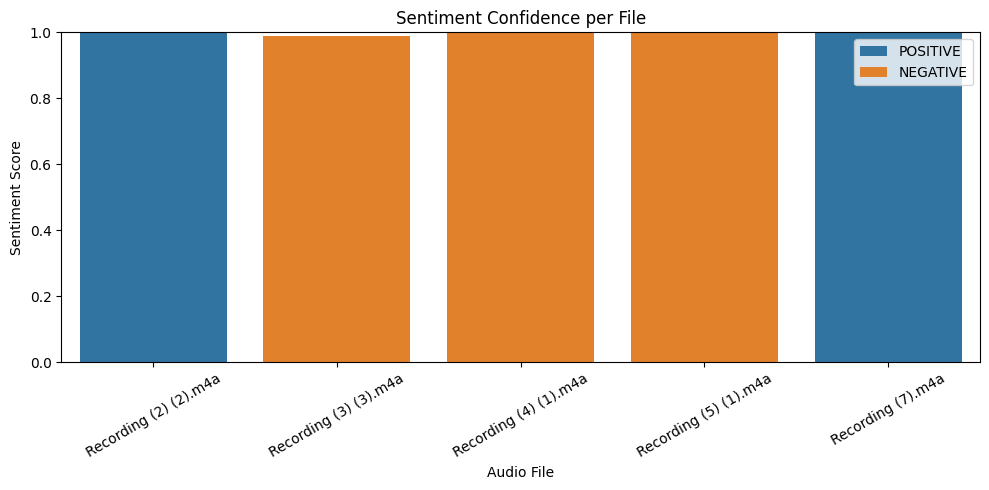

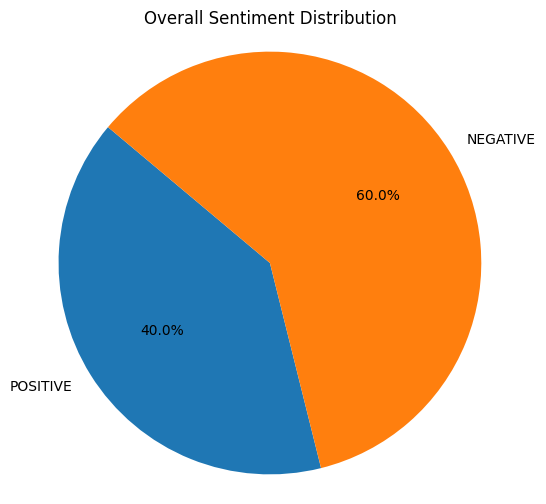

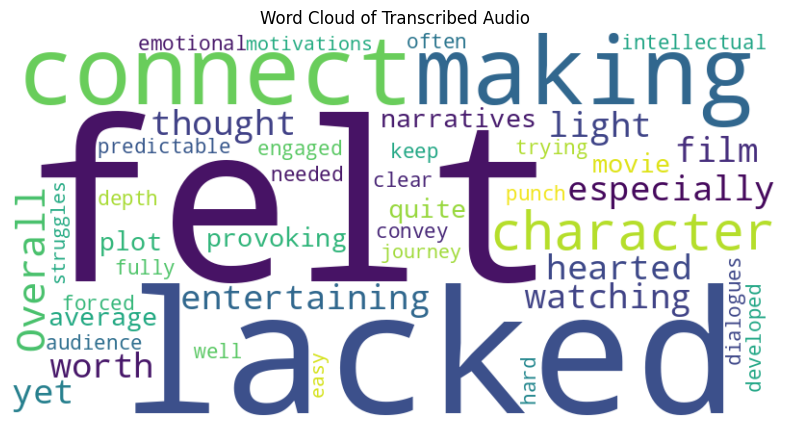

In [5]:
# Install required packages
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q transformers torch pydub matplotlib seaborn wordcloud
!apt install -y ffmpeg

# Uploading up to 5 audio files
from google.colab import files
uploaded = files.upload()

import whisper
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from transformers import pipeline
from pydub import AudioSegment

#Loading Models
model = whisper.load_model("base")
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
sentiment_analyzer = pipeline("sentiment-analysis")

# Transcription function
def transcribe_audio(filename):
    if not filename.endswith(".wav"):
        audio = AudioSegment.from_file(filename)
        filename = filename.rsplit('.', 1)[0] + ".wav"
        audio.export(filename, format="wav")
    result = model.transcribe(filename)
    return result["text"]

# Data storage
analysis_data = []

# Processing first 5 files
for idx, fname in enumerate(list(uploaded.keys())[:5]):
    print(f"\n===========================")
    print(f"🎧 File {idx + 1}: {fname}")

    text = transcribe_audio(fname)
    print("\n📝 Transcription:")
    print(text)

    summary = summarizer(text, max_length=100, min_length=25, do_sample=False)[0]["summary_text"]
    print("\n🧠 Summary:")
    print(summary)

    sentiment = sentiment_analyzer(text[:512])[0]
    print("\n📊 Sentiment:")
    print(f"Label: {sentiment['label']}, Confidence: {sentiment['score']:.2f}")

    # Saving data for visualization
    analysis_data.append({
        "file": fname,
        "text": text,
        "summary": summary,
        "sentiment_label": sentiment['label'],
        "sentiment_score": sentiment['score']
    })

# Visualizing Sentiment Scores
plt.figure(figsize=(10, 5))
sns.barplot(x=[d["file"] for d in analysis_data], y=[d["sentiment_score"] for d in analysis_data],
            hue=[d["sentiment_label"] for d in analysis_data], dodge=False)
plt.title("Sentiment Confidence per File")
plt.xlabel("Audio File")
plt.ylabel("Sentiment Score")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Pie Chart of Sentiment Labels
from collections import Counter
label_counts = Counter([d["sentiment_label"] for d in analysis_data])
plt.figure(figsize=(6, 6))
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Overall Sentiment Distribution")
plt.axis("equal")
plt.show()

# Word Cloud for All Transcripts Combined
all_text = " ".join(d["text"] for d in analysis_data)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Transcribed Audio")
plt.show()
